# Stable Diffusion
https://en.wikipedia.org/wiki/Stable_Diffusion

### Stable Diffusion Huggingface
https://huggingface.co/spaces/stabilityai/stable-diffusion

### Waifu Diffusion Huggingface
https://huggingface.co/hakurei/waifu-diffusion

### Prompts guide
https://www.reddit.com/r/WaifuDiffusion/comments/xudcdp/prompts_guide_by_cdcruz/

In [ ]:
try:
    #from diffusers import StableDiffusionPipeline
    import diffusers
except:
    !pip install -q transformers
    !pip install -q accelerate
    !pip install -q diffusers
    #from diffusers import StableDiffusionPipeline
    #from diffusers.pipelines.stable_diffusion import safety_checker
    import diffusers

import torch
import matplotlib.pyplot as plt
import numpy as np
import time

if torch.cuda.is_available():
    device_name = torch.device("cuda")
else:
    device_name = torch.device("cpu")

print("Using {}.".format(device_name))

In [ ]:
# Load diffuser pipeline.
#model_dir = "stabilityai/stable-diffusion-2"
model_dir = "hakurei/waifu-diffusion"

pipe = diffusers.StableDiffusionPipeline.from_pretrained(model_dir, torch_dtype = torch.float32)
pipe = pipe.to(device_name)
#pipe.scheduler = diffusers.EulerDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.scheduler = diffusers.EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.safety_checker = lambda images, **kwargs: [images, [False] * len(images)]
pipe = pipe.to(device_name)

In [85]:
steps = 50
width = 512
height = 704
scale = 7.5
seed = 123
N = 1

gen = torch.Generator(device = device_name).manual_seed(seed)

prompt = "((masterpiece)),(best quality),(8k wallpaper),(beautiful detailed face),photorealistic,"
prompt += "(perfect anatomy),(1girl),solo,long hair,(white bikini),(large breasts),spreading legs,"
prompt += "(pleasured expression),slim,thin waist,(mature woman),perfect face,(cleavage),"

negative_prompt = "(worst quality),(low quality),medium quality,deleted,lowres,comic,cartoon,3d,(bad anatomy),bad hands,text,error,"
negative_prompt += "(deformed),blurry,missing fingers,extra digit,fewer digits,(disfigured),(poorly drawn face),mutation,mutated,extra limb,ugly,"
negative_prompt += "poorly drawn hands,two heads,child,kid,gross,mutilated,disgusting,horrible,scary,evil,old,conjoined"

#negative_prompt = "deformed, blurry, bad anatomy, disfigured, poorly drawn face, mutation, mutated, extra limbs, ugly,"
#negative_prompt += "poorly drawn hands, two heads,child, kid, gross, mutilated, disgusting, horrible, scary, evil, old, conjoined"

image_list = []
with torch.autocast("cuda"): 
    for i in range(N): 
        image = pipe(prompt, height = height, width = width, num_inference_steps = steps, guidance_scale = scale,
                     negative_prompt = negative_prompt, generator = gen)
        image_list.append(image)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['),']


  0%|          | 0/50 [00:00<?, ?it/s]

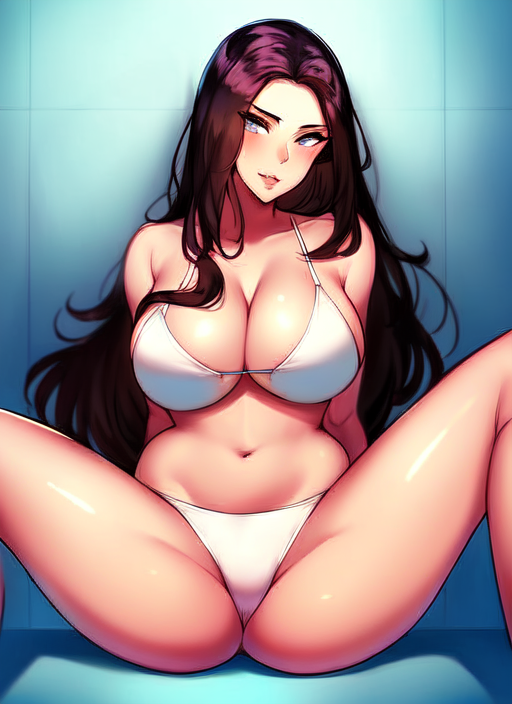

In [86]:
for i in range(len(image_list)):
    display(image_list[i].images[0])